# Robovetter TCES Injection Analysis

In [50]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt

In [3]:
# Load Dataset
df = ascii.read('../data/raw/tces/kplr_dr25_inj1_tces.txt').to_pandas()
df.head()

,TCE_ID,KIC,Disp,Score,NTL,SS,CO,EM,period,epoch,...,Rs,Ts,logg,a,Rp/Rs,a/Rs,impact,SNR_DV,Sp,Fit_Prov
0,000757280-01,757280,PC,0.332,0,0,0,0,380.920455,419.079229,...,1.638,6543,4.082,1.08759,0.013436,135.22,0.6928,8.2,3.725,1
1,000891916-01,891916,PC,1.000,0,0,0,0,202.818535,230.721419,...,0.741,5602,4.587,0.62037,0.040966,286.97,0.4324,18.6,1.259,1
2,000892195-01,892195,FP,0.005,0,0,1,0,192.790771,139.332186,...,1.668,5522,3.984,0.64846,0.015241,81.38,0.2219,12.2,5.512,1
3,000892667-01,892667,PC,0.812,0,0,0,0,182.637810,307.049488,...,1.654,6609,4.105,0.68251,0.016619,81.96,0.2869,13.3,10.039,1
4,000892678-01,892678,PC,0.797,0,0,0,0,142.708025,245.606837,...,1.889,6137,3.936,0.55566,0.011576,55.73,0.7000,12.3,14.688,1


### Feature List

In [12]:
list(df.columns.values)

['TCE_ID',
 'KIC',
 'Disp',
 'Score',
 'NTL',
 'SS',
 'CO',
 'EM',
 'period',
 'epoch',
 'Expected_MES',
 'MES',
 'NTran',
 'depth',
 'duration',
 'Rp',
 'Rs',
 'Ts',
 'logg',
 'a',
 'Rp/Rs',
 'a/Rs',
 'impact',
 'SNR_DV',
 'Sp',
 'Fit_Prov']

### NaN Count
Identify the count of NaN values in the dataset.

In [13]:
df.isna().sum()

TCE_ID          0
KIC             0
Disp            0
Score           0
NTL             0
SS              0
CO              0
EM              0
period          0
epoch           0
Expected_MES    0
MES             0
NTran           0
depth           0
duration        0
Rp              0
Rs              0
Ts              0
logg            0
a               0
Rp/Rs           0
a/Rs            0
impact          0
SNR_DV          0
Sp              0
Fit_Prov        0
dtype: int64

### Target Label Distribution

In [4]:
df['Disp'].describe()

count     45377
unique        2
top          PC
freq      38668
Name: Disp, dtype: object

In [11]:
# Target Label Replacement Routine
df['Disp'].replace('FP', '0', inplace=True)
df['Disp'].replace('PC', '1', inplace=True)
df.head()

,TCE_ID,KIC,Disp,Score,NTL,SS,CO,EM,period,epoch,...,Rs,Ts,logg,a,Rp/Rs,a/Rs,impact,SNR_DV,Sp,Fit_Prov
0,000757280-01,757280,1,0.332,0,0,0,0,380.920455,419.079229,...,1.638,6543,4.082,1.08759,0.013436,135.22,0.6928,8.2,3.725,1
1,000891916-01,891916,1,1.000,0,0,0,0,202.818535,230.721419,...,0.741,5602,4.587,0.62037,0.040966,286.97,0.4324,18.6,1.259,1
2,000892195-01,892195,0,0.005,0,0,1,0,192.790771,139.332186,...,1.668,5522,3.984,0.64846,0.015241,81.38,0.2219,12.2,5.512,1
3,000892667-01,892667,1,0.812,0,0,0,0,182.637810,307.049488,...,1.654,6609,4.105,0.68251,0.016619,81.96,0.2869,13.3,10.039,1
4,000892678-01,892678,1,0.797,0,0,0,0,142.708025,245.606837,...,1.889,6137,3.936,0.55566,0.011576,55.73,0.7000,12.3,14.688,1


### Score

In [14]:
df['Score'].describe()

count    45377.000000
mean         0.740252
std          0.317874
min          0.000000
25%          0.615000
50%          0.889000
75%          0.976000
max          1.000000
Name: Score, dtype: float64

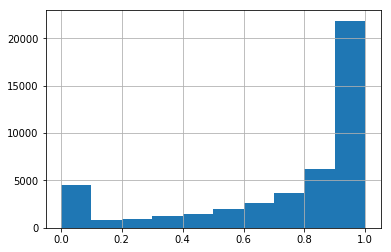

In [16]:
df['Score'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Score, dtype: object

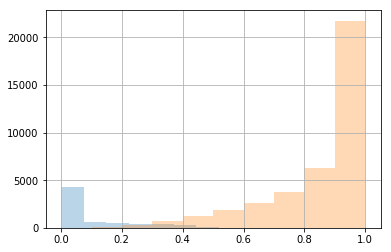

In [48]:
df.groupby('Disp')['Score'].hist(alpha=0.3)

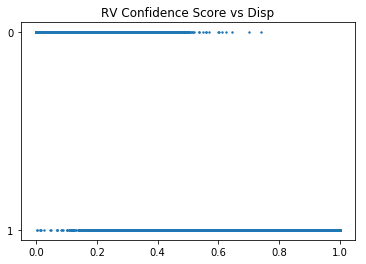

In [25]:
plt.scatter(df['Score'], df['Disp'], s=2)
plt.title('RV Confidence Score vs Disp')
plt.show()

### FP Categories

In [40]:
# FP Co-Occurence Matrix
cat = ['NTL', 'CO', 'SS', 'EM']
fp_cat = df[cat]
fp_com = fp_cat.T.dot(fp_cat)
fp_com

,NTL,CO,SS,EM
NTL,5303,196,0,2
CO,196,1021,13,1
SS,0,13,576,0
EM,2,1,0,23


### Period

In [42]:
df['period'].describe()

count    45377.000000
mean       219.799923
std        138.374036
min          0.506997
25%         97.826114
50%        210.995262
75%        331.259525
max        707.453529
Name: period, dtype: float64

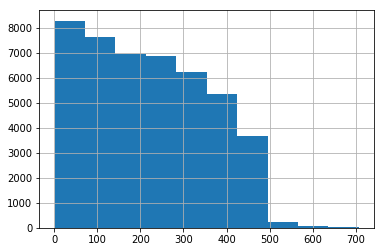

In [43]:
df['period'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: period, dtype: object

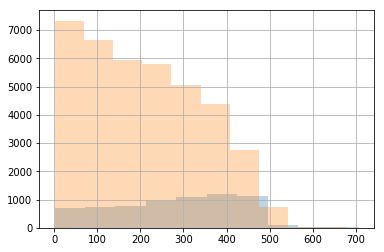

In [47]:
df.groupby('Disp')['period'].hist(alpha=0.3)

### Epoch

In [60]:
df['epoch'].describe()

count    45377.000000
mean       235.714712
std         97.411422
min        131.505622
25%        157.487289
50%        205.242192
75%        287.132486
max        613.456697
Name: epoch, dtype: float64

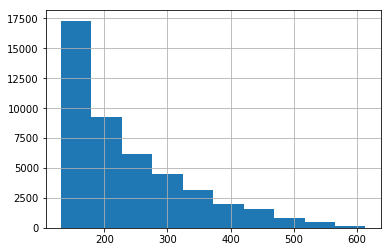

In [62]:
df['epoch'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: epoch, dtype: object

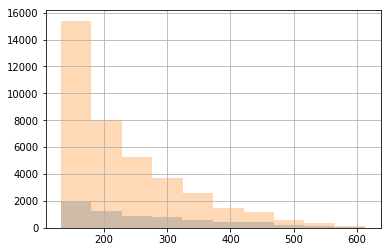

In [65]:
df.groupby('Disp')['epoch'].hist(alpha=0.3)

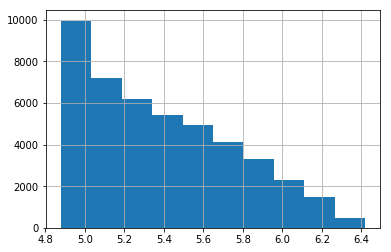

In [74]:
# Perform Log Transformation on Data
df['epoch'].transform(np.log).hist()

### Expected MES

In [76]:
df['Expected_MES'].describe()

count    45377.000000
mean        12.873630
std          8.154413
min          2.889600
25%          9.462200
50%         11.249400
75%         13.403300
max        259.054600
Name: Expected_MES, dtype: float64

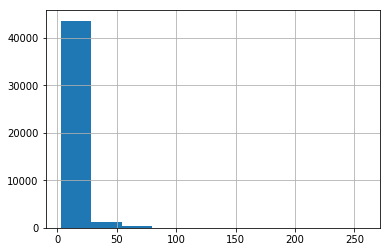

In [77]:
df['Expected_MES'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Expected_MES, dtype: object

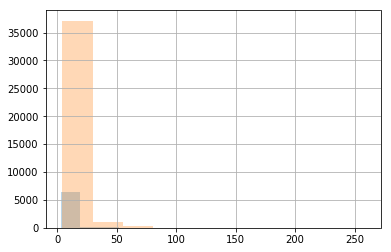

In [78]:
df.groupby('Disp')['Expected_MES'].hist(alpha=0.3)

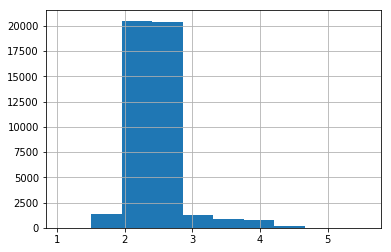

In [79]:
df['Expected_MES'].transform(np.log).hist()